Mood Prediction using Random Forest Classifier
Based on Linear Regression Implementation Notebook

IMPORT LIBRABRIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

LOAD DATASET

In [3]:
df = pd.read_csv("spotify_dataset.csv")

print("Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

Dataset loaded successfully!
Shape: (114000, 21)
   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To B

CLEANING OF DATASET

In [4]:
columns_to_check = df.dropna(subset=["tempo", "energy", "valence", "loudness", "danceability"])
print("After dropping missing values:", df.shape)

After dropping missing values: (114000, 21)


MOOD COLUMN FOR TARGET USE

In [5]:
def label_mood(row):
    if row['valence'] >= 0.5 and row['energy'] >= 0.5:
        return "Happy"
    elif row['valence'] >= 0.5 and row['energy'] < 0.5:
        return "Calm"
    elif row['valence'] < 0.5 and row['energy'] >= 0.5:
        return "Energetic"
    else:
        return "Sad"

In [6]:
df['mood'] = df.apply(label_mood, axis=1)
print("Mood column created")
print(df['mood'].value_counts())

Mood column created
mood
Happy        43405
Energetic    38761
Sad          23086
Calm          8748
Name: count, dtype: int64


EXPLORATORY DATA ANALYSIS

C:\Users\nisht\AppData\Local\Temp\ipykernel_22348\1739880527.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='mood', data=df, palette='viridis')


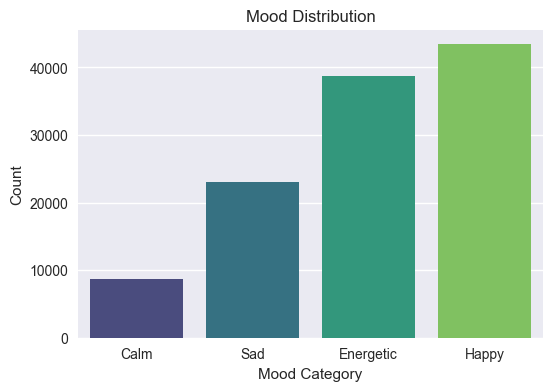

In [7]:
plt.style.use("seaborn-v0_8")

#  Mood Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='mood', data=df, palette='viridis')
plt.title("Mood Distribution")
plt.xlabel("Mood Category")
plt.ylabel("Count")
plt.show()

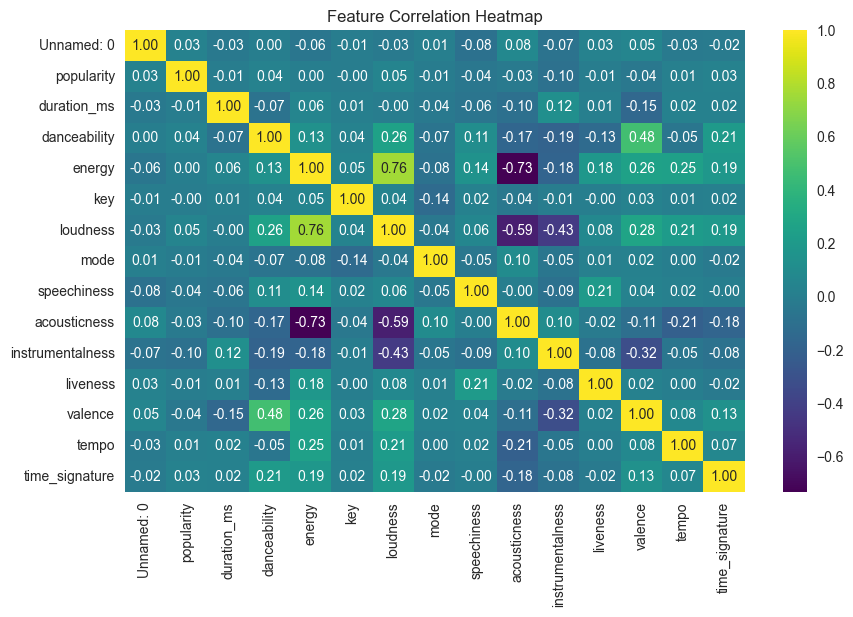

In [8]:
plt.style.use("seaborn-v0_8")

# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])   # only numeric columns
sns.heatmap(numeric_df.corr(), cmap='viridis', annot=True, fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

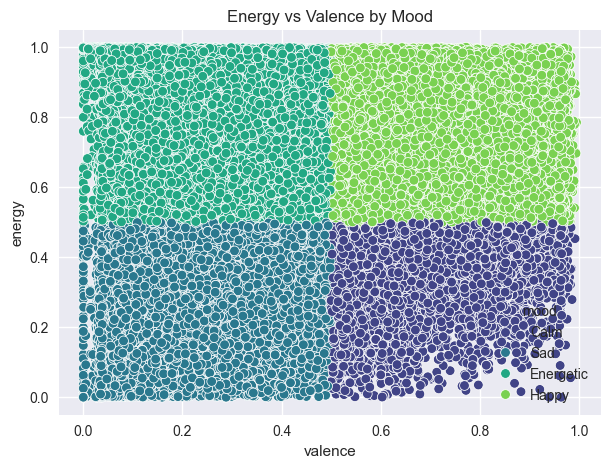

In [9]:
plt.style.use("seaborn-v0_8")

#Energy vs Valence Scatter Plot (colored by mood)
plt.figure(figsize=(7,5))
sns.scatterplot(x='valence', y='energy', hue='mood', data=df, palette='viridis')
plt.title("Energy vs Valence by Mood")
plt.show()

C:\Users\nisht\AppData\Local\Temp\ipykernel_22348\1712225641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='mood', y='tempo', palette='viridis')


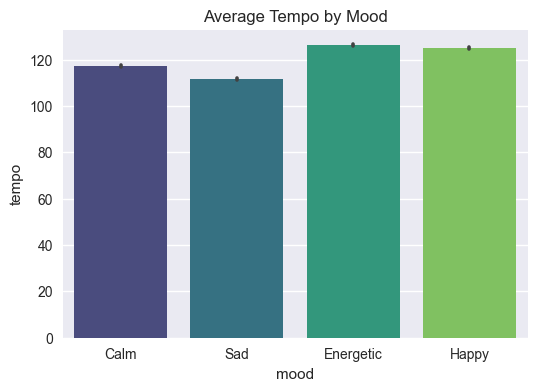

In [10]:
plt.style.use("seaborn-v0_8")

#  Average Feature Values by Mood
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='mood', y='tempo', palette='viridis')
plt.title("Average Tempo by Mood")
plt.show()

FEATURE SELECTION

In [11]:
feature_cols = ["tempo", "energy", "valence", "loudness", "danceability",
                "acousticness", "instrumentalness", "speechiness"]

X = df[feature_cols] #INDEPENDANT
y = df["mood"]       #DEPENDANT

SCALING

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

DATA SPLITTING

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
X_train

array([[ 1.52888994,  0.23702033,  0.18873634, ..., -0.71427034,
        -0.15845271, -0.40812765],
       [ 0.25869457,  1.35816803, -1.68274456, ..., -0.94666752,
        -0.50331718,  0.03355551],
       [ 0.39499422,  0.29268015,  0.90230593, ..., -0.88719162,
        -0.18623466, -0.50838122],
       ...,
       [ 1.93228488, -0.93183578,  1.54644712, ..., -0.48691645,
         2.43560623, -0.47054968],
       [ 0.31360138,  0.68627455, -1.22297431, ...,  2.02420131,
        -0.50410137,  7.71146534],
       [ 0.72173312, -1.21013486, -0.29726241, ...,  1.8197031 ,
        -0.50410431, -0.50648964]], shape=(91200, 8))

MODEL TRAINING

In [15]:
y_train

8963          Happy
3285      Energetic
102811        Happy
107814    Energetic
65879         Happy
            ...    
18563         Happy
54989     Energetic
111192         Calm
18353     Energetic
28336           Sad
Name: mood, Length: 91200, dtype: object

In [16]:
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


MODEL EVALUATION

In [17]:
y_pred = clf.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n-------------------------------------------")
print(" Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n-------------------------------------------")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        Calm       1.00      1.00      1.00      1750
   Energetic       1.00      1.00      1.00      7752
       Happy       1.00      1.00      1.00      8681
         Sad       1.00      1.00      1.00      4617

    accuracy                           1.00     22800
   macro avg       1.00      1.00      1.00     22800
weighted avg       1.00      1.00      1.00     22800


-------------------------------------------
 Accuracy: 100.0 %

-------------------------------------------

Confusion Matrix:
 [[1750    0    0    0]
 [   0 7752    0    0]
 [   0    0 8681    0]
 [   0    0    0 4617]]


CLUSTERING CHART

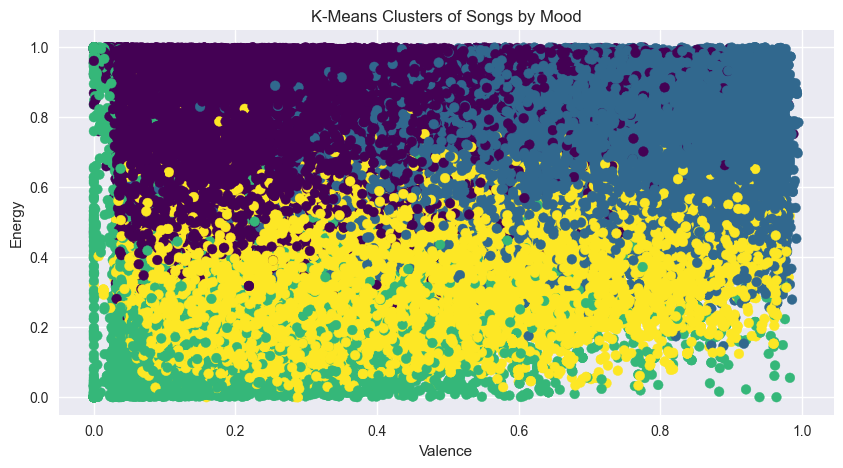

In [18]:
from sklearn.cluster import KMeans

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df.groupby('Cluster')[['energy','valence','tempo']].mean()

# Visualize clusters
plt.figure(figsize=(10,5))
plt.scatter(df['valence'], df['energy'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.title('K-Means Clusters of Songs by Mood')
plt.show()

RECOMMENDATION THROUGH K MEANS CLUSTERING

In [19]:
# --- Define feature columns used for clustering / modeling ---
feature_cols = [
    "tempo","energy","valence","loudness","danceability",
    "acousticness","instrumentalness","speechiness"
]

# --- Find artist column name in dataset (support 'artists' or 'artist_name') ---
artist_col = None
for cand in ["artist_name","artists","artist"]:
    if cand in df.columns:
        artist_col = cand
        break

# --- Ensure feature columns exist and are numeric (coerce non-numeric -> NaN) ---
for c in feature_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")
    else:
        raise KeyError(f"Required feature column missing from dataset: {c}")

# --- Drop rows missing any feature value ---
df = df.dropna(subset=feature_cols)
print("After dropping missing feature rows:", df.shape)

# --- Build final keep list (always include track_name and artist if present) ---
keep_cols = []
if "track_name" in df.columns:
    keep_cols.append("track_name")
if artist_col:
    keep_cols.append(artist_col)
keep_cols += feature_cols

# --- Select only these columns so artist stays available for display ---
df = df[keep_cols].copy()
print("Columns kept:", df.columns.tolist())


After dropping missing feature rows: (114000, 23)
Columns kept: ['track_name', 'artists', 'tempo', 'energy', 'valence', 'loudness', 'danceability', 'acousticness', 'instrumentalness', 'speechiness']


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_by_cluster(song_features, df, kmeans_model, n_recommendations=5):
    # Ensure clusters exist
    if 'Cluster' not in df.columns:
        df['Cluster'] = kmeans_model.predict(df[feature_cols])

    # Convert input to numpy array
    input_features = np.array([[song_features[col] for col in feature_cols]])

    # Predict cluster for the input song
    cluster_label = kmeans_model.predict(input_features)[0]

    # Filter songs from that cluster
    cluster_songs = df[df['Cluster'] == cluster_label].copy()

    # Compute cosine similarity
    cluster_features = cluster_songs[feature_cols].values
    similarities = cosine_similarity(input_features, cluster_features)[0]

    # Pick top similar songs
    top_indices = similarities.argsort()[-n_recommendations:][::-1]

    # Columns to display safely
    display_cols = ['track_name', 'artists', 'Cluster'] + feature_cols
    display_cols = [col for col in display_cols if col in df.columns]

    return cluster_songs.iloc[top_indices][display_cols]


In [21]:
new_song = {
    'energy': 0.8,
    'valence': 0.7,
    'tempo': 120,
    'danceability': 0.75,
    'loudness': -5.0,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'speechiness': 0.0
}

recommendations = recommend_by_cluster(new_song, df, kmeans)
display(recommendations)


c:\Users\nisht\OneDrive\Desktop\SPOTIfy\Spotify_song_mood_recommender\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,track_name,artists,Cluster,tempo,energy,valence,loudness,danceability,acousticness,instrumentalness,speechiness
97895,Faca Que Não Corta / Mineiro de Monte Belo / P...,Lucas Reis & Thácio,0,119.993,0.831,0.728,-4.978,0.742,0.1400,0.000017,0.0679
38766,You're in Love with a Psycho,Kasabian,0,120.009,0.805,0.711,-5.049,0.721,0.0193,0.000107,0.0473
21760,Eko Miami,Maleek Berry,0,102.122,0.659,0.567,-4.216,0.706,0.0928,0.000003,0.0381
23644,Silver Lining,Thomas Lizzara,0,121.981,0.737,0.702,-5.015,0.750,0.1440,0.000933,0.0304
12838,Big Four,Big Four,0,106.970,0.761,0.648,-4.409,0.699,0.1320,0.000000,0.0491


VALIDATION OF RECOMMENDATION

In [22]:
from sklearn.metrics import silhouette_score

X = df[feature_cols].values
labels = df['Cluster']
score = silhouette_score(X, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.4901051043579451


PICKLE FILE FOR DEPLOYMENT

In [23]:
feature_cols = ["tempo", "energy", "valence", "loudness", "danceability",
                "acousticness", "instrumentalness", "speechiness"]

with open("mood_classifier.pkl", "wb") as f:
    pickle.dump({
        "model": clf,
        "scaler": scaler,
        "features": feature_cols
    }, f)

print("\nModel saved successfully as 'mood_classifier.pkl'")


Model saved successfully as 'mood_classifier.pkl'


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def predict_mood_and_recommend(song_name, artist_name, df, model, kmeans_model, n_recommendations=5):
    feature_cols = [
        'tempo','energy','valence','loudness','danceability',
        'acousticness','instrumentalness','speechiness'
    ]
    
    # Locate song in dataset
    song_row = df[
    df['track_name'].str.strip().str.lower() == song_name.strip().lower()
    
    ]
    song_row = song_row[
    song_row['artists'].str.lower().str.contains(artist_name.strip().lower(), na=False)
    ]
    
    if song_row.empty : 
        return f"Song '{song_name}' by '{artist_name}' not found."

    # Predict mood
    song_features = song_row[feature_cols].values
    predicted_mood = model.predict(song_features)[0]

    # Predict cluster (use your existing kmeans model)
    cluster_label = kmeans_model.predict(song_features)[0]
    cluster_songs = df[df['Cluster'] == cluster_label].copy()

    # Recommend similar songs
    cluster_features = cluster_songs[feature_cols].values
    similarities = cosine_similarity(song_features, cluster_features)[0]
    top_indices = similarities.argsort()[-n_recommendations:][::-1]
    recommendations = cluster_songs.iloc[top_indices][['track_name','artists'] + feature_cols]

    print(f"\n🎵 '{song_name}' by {artist_name} → Predicted mood: {predicted_mood}\n")
    print("🎧 Recommended songs:")
    return recommendations


In [25]:
result = predict_mood_and_recommend(
    "Bad Liar", "Anna Hamilton", df, clf, kmeans
)
display(result)



🎵 'Bad Liar' by Anna Hamilton → Predicted mood: Happy

🎧 Recommended songs:


,track_name,artists,tempo,energy,valence,loudness,danceability,acousticness,instrumentalness,speechiness
13,Bad Liar,Anna Hamilton,87.103,0.234,0.209,-6.441,0.691,0.777,0.00000,0.0285
15088,Bad Liar,Anna Hamilton,87.103,0.234,0.209,-6.441,0.691,0.777,0.00000,0.0285
282,Someone You Loved - Acoustic,Plamina,106.244,0.298,0.310,-7.910,0.647,0.861,0.00000,0.0311
14832,Papa bist du müde,Rolf Zuckowski,97.862,0.414,0.267,-7.300,0.632,0.867,0.00893,0.0256
11895,Hop Little Bunnies,Toddler Fun Learning,112.098,0.410,0.455,-8.295,0.773,0.862,0.00000,0.0398
